In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
loans = pd.read_csv('../Downloads/LoanStats_securev1_2020Q2.csv',skiprows=1)

/Users/katherine/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,169165183,NaN,15000.0,15000.0,15000.0,36 months,9.56%,480.92,A,A3,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,169218684,NaN,5600.0,5600.0,5600.0,36 months,10.81%,182.84,A,A5,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,169158642,NaN,15000.0,15000.0,15000.0,60 months,18.24%,382.87,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,169227883,NaN,25000.0,25000.0,25000.0,36 months,18.24%,906.83,C,C2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,169131423,NaN,35000.0,35000.0,35000.0,60 months,14.02%,814.76,B,B2,...,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# drop_list = ['member_id','id','sub_grade', 'emp_title',  'title', 'zip_code', 'addr_state', 
#              'mths_since_last_delinq' ,'initial_list_status','title','issue_d','last_pymnt_d','last_pymnt_amnt',
#              'next_pymnt_d','last_credit_pull_d','policy_code','collection_recovery_fee', 'earliest_cr_line']
# loans.drop(drop_list, axis=1, inplace = True)

In [6]:
loans['grade'].value_counts()

A    6588
B    4215
C    2326
D     174
Name: grade, dtype: int64

In [7]:
df = loans[['fico_range_high','loan_amnt','grade','int_rate','annual_inc','emp_length','term','home_ownership','loan_status']]

In [8]:
df.head()

,fico_range_high,loan_amnt,grade,int_rate,annual_inc,emp_length,term,home_ownership,loan_status
0,759.0,15000.0,A,9.56%,230000.0,< 1 year,36 months,RENT,Current
1,684.0,5600.0,A,10.81%,66800.0,2 years,36 months,MORTGAGE,Current
2,679.0,15000.0,C,18.24%,82000.0,NaN,60 months,MORTGAGE,Current
3,674.0,25000.0,C,18.24%,71000.0,3 years,36 months,MORTGAGE,Current
4,759.0,35000.0,B,14.02%,120000.0,10+ years,60 months,MORTGAGE,Current


In [9]:
# Transform ordinal variable
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4
    }
}

df = df.replace(mapping_dict)
df[['emp_length','grade']].head()

,emp_length,grade
0,0.0,1.0
1,2.0,1.0
2,NaN,3.0
3,3.0,3.0
4,10.0,2.0


In [10]:
# One-hot Encoding for Nonordinal variable
df.loc[df.home_ownership.isin(['ANY']),'home_ownership']='MORTGAGE'
df['home_ownership'].value_counts()

MORTGAGE    7390
RENT        4476
OWN         1437
Name: home_ownership, dtype: int64

In [11]:
n_columns = ["home_ownership", "term"] 
dummy_df = pd.get_dummies(df[n_columns])# 用get_dummies进行one hot编码
df = pd.concat([df, dummy_df], axis=1) #当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并

In [12]:
df = df.drop(n_columns, axis=1)

In [13]:
df['int_rate'] = df['int_rate'].str.rstrip('%').astype('float')

In [14]:
df.dropna(inplace=True)
df.shape

(12284, 12)

In [15]:
def coding(col, codeDict):

    colCoded = pd.Series(col, copy=True)
    for key, value in codeDict.items():
        colCoded.replace(key, value, inplace=True)

    return colCoded

df["loan_status"] = coding(df["loan_status"], 
                           {'Current':0,'Fully Paid':0,
                            'In Grace Period':1,'Late (31-120 days)':1,'Late (16-30 days)':1,'Charged Off':1})
df['loan_status'].value_counts()

0    12174
1      110
Name: loan_status, dtype: int64

In [16]:
df.head()

,fico_range_high,loan_amnt,grade,int_rate,annual_inc,emp_length,loan_status,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,term_ 36 months,term_ 60 months
0,759.0,15000.0,1.0,9.56,230000.0,0.0,0,0,0,1,1,0
1,684.0,5600.0,1.0,10.81,66800.0,2.0,0,1,0,0,1,0
3,674.0,25000.0,3.0,18.24,71000.0,3.0,0,1,0,0,1,0
4,759.0,35000.0,2.0,14.02,120000.0,10.0,0,1,0,0,0,1
5,664.0,25000.0,3.0,19.95,70000.0,2.0,0,1,0,0,0,1


### Handle imbalanced data

In [17]:
X, y = df.drop(['loan_status'],axis=1), df['loan_status']
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('Number of records: {}; positive ratio {:.2%}; nagative ratio {:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))
print('feature dimension：', X.shape[1])

Number of records: 12284; positive ratio 99.10%; nagative ratio 0.90%
feature dimension： 11


In [18]:
from imblearn.over_sampling import SMOTE
# handle imbalanced data
sm = SMOTE(random_state=42)    # over-sampling
X, y = sm.fit_sample(X, y)
print('after balancing data')
n_sample = y.shape[0]
n_pos_sample = y[y == 0].shape[0]
n_neg_sample = y[y == 1].shape[0]
print('number of records：{}; positive ratio {:.2%}; nagative ratio {:.2%}'.format(n_sample,
                                                   n_pos_sample / n_sample,
                                                   n_neg_sample / n_sample))

after balancing data
number of records：24348; positive ratio 50.00%; nagative ratio 50.00%


## Random Forest Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df_col = list(X.columns)
X_scale = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [21]:
# Common sklearn Model Helpers
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
# sklearn modules for ML model selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


rf = RandomForestClassifier(n_estimators=100)
rf = rf.fit(X_train,y_train)

Accuracy of Random Forest Classifier on test set: 99.49%


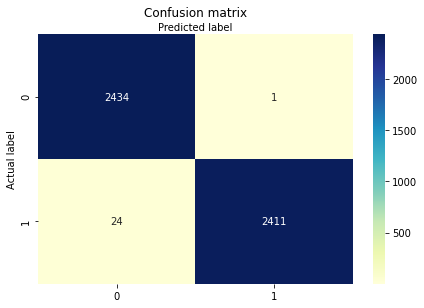

In [22]:
cnf_matrix = metrics.confusion_matrix(y_test, rf.predict(X_test))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt="d")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
print('Accuracy of Random Forest Classifier on test set: {:.2f}%'.format(rf.score(X_test, y_test)*100))

In [23]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score

rf.fit(X_train, y_train) # fit optimised model to the training data
probs = rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1]
rf_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_roc_auc)

AUC score: 0.999


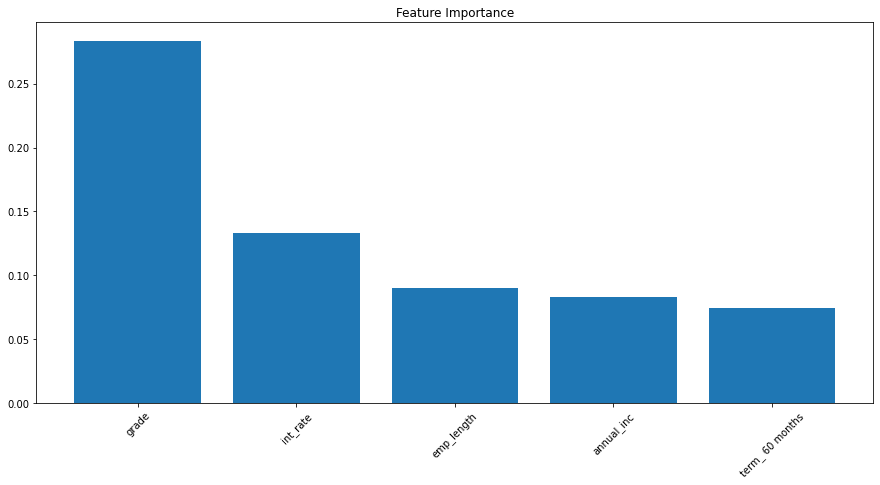

In [24]:
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:5] # Sort feature importances in descending order and choose top 5
names = [df_col[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7))
plt.title("Feature Importance")
plt.bar(range(5), importances[indices])
plt.xticks(range(5), names, rotation=45)
plt.show()

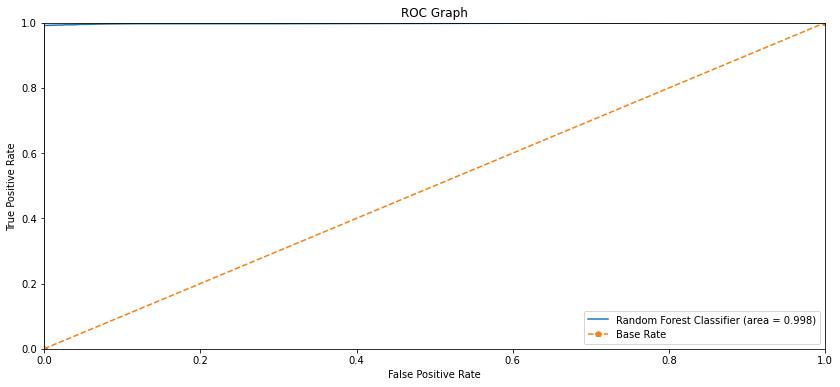

In [38]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.3f)' % rf_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],'p--',label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log = log.fit(X_train,y_train)

Accuracy of Logistic Regression on test set: 65.26%


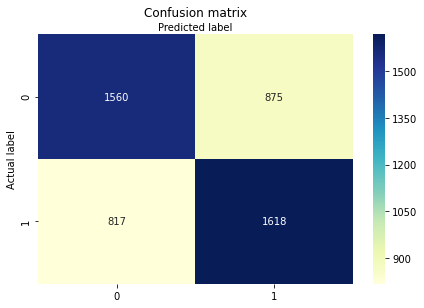

In [27]:
cnf_matrix = metrics.confusion_matrix(y_test, log.predict(X_test))
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt="d")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label');
print('Accuracy of Logistic Regression on test set: {:.2f}%'.format(log.score(X_test, y_test)*100))

In [28]:
log.fit(X_train, y_train) # fit optimised model to the training data
probs = log.predict_proba(X_test) # predict probabilities
probs = probs[:, 1]
log_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % log_roc_auc)

AUC score: 0.698


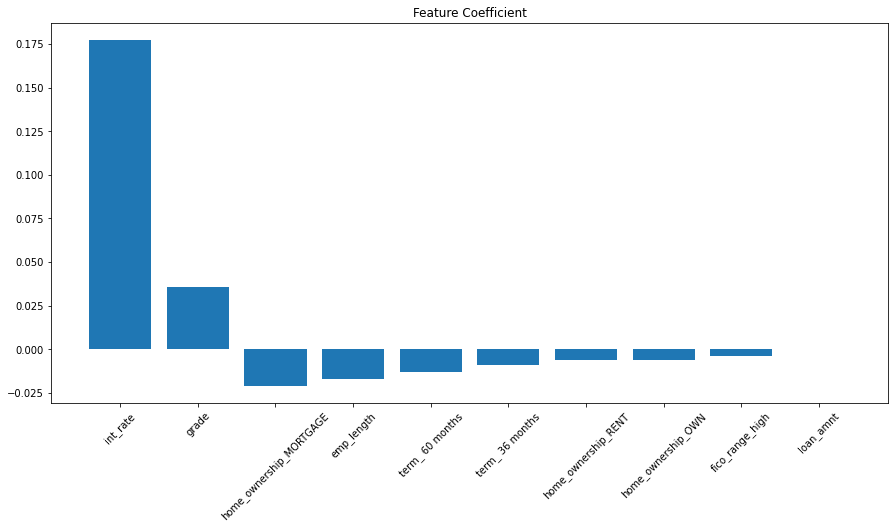

In [52]:
importances = log.coef_[0]
indices = np.argsort(np.abs(importances))[::-1][:10]
names = [df_col[i] for i in indices]
plt.figure(figsize=(15, 7))
plt.title("Feature Coefficient")
plt.bar(range(10), importances[indices])
plt.xticks(range(10), names, rotation=45)
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
xgbc = XGBClassifier(booster='gbtree',objective= 'binary:logistic',random_state=0)
xgbc.fit(X_train,y_train)

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/katherine/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/katherine/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']
